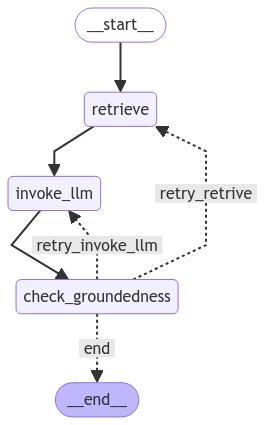

In [21]:
from typing import TypedDict, Annotated, Sequence, List
from langgraph.graph import Graph, StateGraph, END
from langgraph.prebuilt import ToolExecutor
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langchain_community.chat_models import ChatOllama
from langchain_core.documents.base import Document

# 상태 정의
class AgentState(TypedDict):
    context: Sequence[Document]
    answer: str
    question: str
    groundness_status: str

def retrieve(state: AgentState) -> AgentState:
    docs = []
    return AgentState(context=docs)

def invoke_llm(state: AgentState) -> AgentState:
    answer = ""
    return AgentState(answer=answer)
    
def check_groundedness(state: AgentState) -> AgentState:
    groundness_status = ""
    return AgentState(groundness_status=groundness_status)
    
def decision(state: AgentState) -> str:
    # retry_retrive, retry_invoke_llm, end
    decision = "end"
    return decision

# 그래프 생성
workflow = StateGraph(AgentState)

# 노드 추가
workflow.add_node("retrieve", retrieve)
workflow.add_node("invoke_llm", invoke_llm)
workflow.add_node("check_groundedness", check_groundedness)

# 엣지 연결
workflow.add_edge("retrieve", "invoke_llm")
workflow.add_edge("invoke_llm", "check_groundedness")
workflow.add_conditional_edges(
    "check_groundedness",
    decision,
    {
        "retry_retrive": "retrieve",
        "retry_invoke_llm": "invoke_llm",
        "end": END
    }
)

# 시작점 셋팅
workflow.set_entry_point("retrieve")

# 그래프 컴파일
app = workflow.compile()

from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

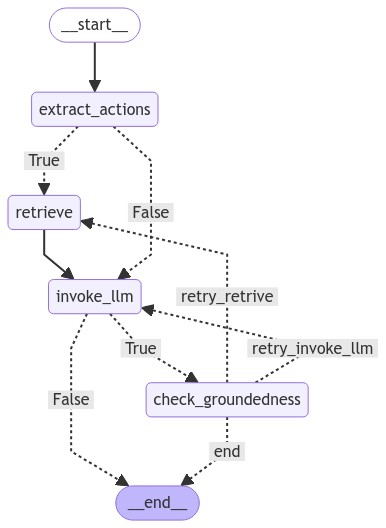

In [28]:
from typing import TypedDict, Annotated, Sequence, List
from langgraph.graph import Graph, StateGraph, END
from langgraph.prebuilt import ToolExecutor
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langchain_community.chat_models import ChatOllama
from langchain_core.documents.base import Document

# 상태 정의
class AgentState(TypedDict):
    actions: str
    context: Sequence[Document]
    answer: str
    question: str
    groundness_status: str

def extract_actions(state: AgentState) -> AgentState:
    actions = ""
    return AgentState(actions=actions)

def is_exist_actions(state: AgentState) -> bool:
    is_exist_actions = True
    return is_exist_actions

def retrieve(state: AgentState) -> AgentState:
    docs = []
    return AgentState(context=docs)

def invoke_llm(state: AgentState) -> AgentState:
    answer = ""
    return AgentState(answer=answer)
    
def check_groundedness(state: AgentState) -> AgentState:
    groundness_status = ""
    return AgentState(groundness_status=groundness_status)
    
def decision(state: AgentState) -> str:
    # retry_retrive, retry_invoke_llm, end
    decision = "end"
    return decision

# 그래프 생성
workflow = StateGraph(AgentState)

# 노드 추가
workflow.add_node("extract_actions", extract_actions)
workflow.add_node("retrieve", retrieve)
workflow.add_node("invoke_llm", invoke_llm)
workflow.add_node("check_groundedness", check_groundedness)

# 엣지 연결
workflow.add_conditional_edges(
    "extract_actions",
    is_exist_actions,
    {
        True: "retrieve",
        False: "invoke_llm",
    }
)
workflow.add_edge("retrieve", "invoke_llm")
workflow.add_conditional_edges(
    "invoke_llm",
    is_exist_actions,
    {
        True: "check_groundedness",
        False: END,
    }
)
workflow.add_conditional_edges(
    "check_groundedness",
    decision,
    {
        "retry_retrive": "retrieve",
        "retry_invoke_llm": "invoke_llm",
        "end": END
    }
)

# 시작점 셋팅
workflow.set_entry_point("extract_actions")

# 그래프 컴파일
app = workflow.compile()

from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass